# ***Autism Spectrum Disorder in Adolescents***

### ***Import Required libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

from scipy.io import arff

%matplotlib inline

### ***Setting Max Rows and Columns limits for display*** 

In [2]:
pd.set_option('display.max_columns',25)
pd.set_option('display.max_rows',110)

### ***Read the Adolescents data***

In [3]:
adolescents_asd = pd.read_excel('Autism_Child_data_in_excel.xlsx',sheet_name='Autism_Adolscent')

In [4]:
adolescents_asd.columns

Index(['age', 'gender', 'ethnicity', 'jundice', 'autism', 'relation',
       'contry_of_res', 'used_app_before', 'age_desc', 'A1_Score', 'A2_Score',
       'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score',
       'A9_Score', 'A10_Score', 'result', 'Class'],
      dtype='object')

In [5]:
adolescents_asd.columns = ['age', 'gender', 'ethnicity', 'born_with_jaundice', 'family_member_with_PDD', 'whos_completing_test', 'country', 'used_screening_app_before', 'age_desc', 
                           'Q1_Score','Q2_Score','Q3_Score','Q4_Score','Q5_Score','Q6_Score','Q7_Score','Q8_Score','Q9_Score','Q10_Score', 'screening_score', 'ASD_Label']

In [6]:
adolescents_asd.head()

,age,gender,ethnicity,born_with_jaundice,family_member_with_PDD,whos_completing_test,country,used_screening_app_before,age_desc,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label
0,15,m,Hispanic,yes,yes,Parent,Austria,no,'12-16 years',0,0,0,1,1,1,1,1,1,0,6,NO
1,15,m,Black,no,no,Relative,Austria,no,'12-16 years',0,0,0,0,0,0,0,0,1,1,2,NO
2,12,f,?,no,no,?,AmericanSamoa,no,'12-16 years',0,0,0,0,0,0,0,0,1,1,2,NO
3,14,f,White-European,no,no,Self,'United Kingdom',no,'12-16 years',0,1,1,1,1,1,0,1,1,0,7,YES
4,16,f,?,no,no,?,Albania,no,'12-16 years',1,1,1,1,1,1,1,0,0,0,7,YES


## ***Initial Data Analysis (IDA)***

In [7]:
adolescents_asd.isin(['?']).sum()            # Just checking the number of NULL values in features

age                          0
gender                       0
ethnicity                    6
born_with_jaundice           0
family_member_with_PDD       0
whos_completing_test         6
country                      0
used_screening_app_before    0
age_desc                     0
Q1_Score                     0
Q2_Score                     0
Q3_Score                     0
Q4_Score                     0
Q5_Score                     0
Q6_Score                     0
Q7_Score                     0
Q8_Score                     0
Q9_Score                     0
Q10_Score                    0
screening_score              0
ASD_Label                    0
dtype: int64

### ***Check-1: Features DataType Mismatch***

In [8]:
adolescents_asd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 21 columns):
age                          104 non-null int64
gender                       104 non-null object
ethnicity                    104 non-null object
born_with_jaundice           104 non-null object
family_member_with_PDD       104 non-null object
whos_completing_test         104 non-null object
country                      104 non-null object
used_screening_app_before    104 non-null object
age_desc                     104 non-null object
Q1_Score                     104 non-null int64
Q2_Score                     104 non-null int64
Q3_Score                     104 non-null int64
Q4_Score                     104 non-null int64
Q5_Score                     104 non-null int64
Q6_Score                     104 non-null int64
Q7_Score                     104 non-null int64
Q8_Score                     104 non-null int64
Q9_Score                     104 non-null int64
Q10_Score              

##### **Features datatypes appears to be correct, however, we need to handle the residing data.**

### ***Check-2: Individual features handling***

In [9]:
adolescents_asd.head()

,age,gender,ethnicity,born_with_jaundice,family_member_with_PDD,whos_completing_test,country,used_screening_app_before,age_desc,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label
0,15,m,Hispanic,yes,yes,Parent,Austria,no,'12-16 years',0,0,0,1,1,1,1,1,1,0,6,NO
1,15,m,Black,no,no,Relative,Austria,no,'12-16 years',0,0,0,0,0,0,0,0,1,1,2,NO
2,12,f,?,no,no,?,AmericanSamoa,no,'12-16 years',0,0,0,0,0,0,0,0,1,1,2,NO
3,14,f,White-European,no,no,Self,'United Kingdom',no,'12-16 years',0,1,1,1,1,1,0,1,1,0,7,YES
4,16,f,?,no,no,?,Albania,no,'12-16 years',1,1,1,1,1,1,1,0,0,0,7,YES


### ***Fixing values in GENDER variable***

In [10]:
adolescents_asd['gender'].unique()

array(['m', 'f'], dtype=object)

In [11]:
adolescents_asd['gender'].value_counts()

f    54
m    50
Name: gender, dtype: int64

In [12]:
adolescents_asd['gender'] = adolescents_asd['gender'].apply(lambda val: 0 if val == 'm' else 1)

In [13]:
adolescents_asd['gender'].value_counts()

1    54
0    50
Name: gender, dtype: int64

### ***Fixing values in BORN_WITH_JAUNDICE variable***

In [14]:
adolescents_asd.head()

,age,gender,ethnicity,born_with_jaundice,family_member_with_PDD,whos_completing_test,country,used_screening_app_before,age_desc,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label
0,15,0,Hispanic,yes,yes,Parent,Austria,no,'12-16 years',0,0,0,1,1,1,1,1,1,0,6,NO
1,15,0,Black,no,no,Relative,Austria,no,'12-16 years',0,0,0,0,0,0,0,0,1,1,2,NO
2,12,1,?,no,no,?,AmericanSamoa,no,'12-16 years',0,0,0,0,0,0,0,0,1,1,2,NO
3,14,1,White-European,no,no,Self,'United Kingdom',no,'12-16 years',0,1,1,1,1,1,0,1,1,0,7,YES
4,16,1,?,no,no,?,Albania,no,'12-16 years',1,1,1,1,1,1,1,0,0,0,7,YES


In [15]:
adolescents_asd['born_with_jaundice'].unique()

array(['yes', 'no'], dtype=object)

In [16]:
adolescents_asd['born_with_jaundice'].value_counts()

no     88
yes    16
Name: born_with_jaundice, dtype: int64

In [17]:
adolescents_asd['born_with_jaundice'] = adolescents_asd['born_with_jaundice'].apply(lambda val: 1 if val == 'yes' else 0)

In [18]:
adolescents_asd['born_with_jaundice'].value_counts()

0    88
1    16
Name: born_with_jaundice, dtype: int64

### ***Fixing values in FAMILY_MEMBER_WITH_PDD variable***

In [19]:
adolescents_asd['family_member_with_PDD'].unique()

array(['yes', 'no'], dtype=object)

In [20]:
adolescents_asd['family_member_with_PDD'].value_counts()

no     90
yes    14
Name: family_member_with_PDD, dtype: int64

In [21]:
adolescents_asd['family_member_with_PDD'] = adolescents_asd['family_member_with_PDD'].apply(lambda val: 1 if val == 'yes' else 0)

In [22]:
adolescents_asd['family_member_with_PDD'].value_counts()

0    90
1    14
Name: family_member_with_PDD, dtype: int64

### ***Fixing values in USED_SCREENING_APP_BEFORE variable***

In [23]:
adolescents_asd.head()

,age,gender,ethnicity,born_with_jaundice,family_member_with_PDD,whos_completing_test,country,used_screening_app_before,age_desc,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label
0,15,0,Hispanic,1,1,Parent,Austria,no,'12-16 years',0,0,0,1,1,1,1,1,1,0,6,NO
1,15,0,Black,0,0,Relative,Austria,no,'12-16 years',0,0,0,0,0,0,0,0,1,1,2,NO
2,12,1,?,0,0,?,AmericanSamoa,no,'12-16 years',0,0,0,0,0,0,0,0,1,1,2,NO
3,14,1,White-European,0,0,Self,'United Kingdom',no,'12-16 years',0,1,1,1,1,1,0,1,1,0,7,YES
4,16,1,?,0,0,?,Albania,no,'12-16 years',1,1,1,1,1,1,1,0,0,0,7,YES


In [24]:
adolescents_asd['used_screening_app_before'].unique()

array(['no', 'yes'], dtype=object)

In [25]:
adolescents_asd['used_screening_app_before'].value_counts()

no     100
yes      4
Name: used_screening_app_before, dtype: int64

In [26]:
adolescents_asd['used_screening_app_before'] = adolescents_asd['used_screening_app_before'].apply(lambda val: 1 if val == 'yes' else 0)

In [27]:
adolescents_asd['used_screening_app_before'].value_counts()

0    100
1      4
Name: used_screening_app_before, dtype: int64

### ***Fixing values in AGE_DESC variable***

In [28]:
adolescents_asd.head()

,age,gender,ethnicity,born_with_jaundice,family_member_with_PDD,whos_completing_test,country,used_screening_app_before,age_desc,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label
0,15,0,Hispanic,1,1,Parent,Austria,0,'12-16 years',0,0,0,1,1,1,1,1,1,0,6,NO
1,15,0,Black,0,0,Relative,Austria,0,'12-16 years',0,0,0,0,0,0,0,0,1,1,2,NO
2,12,1,?,0,0,?,AmericanSamoa,0,'12-16 years',0,0,0,0,0,0,0,0,1,1,2,NO
3,14,1,White-European,0,0,Self,'United Kingdom',0,'12-16 years',0,1,1,1,1,1,0,1,1,0,7,YES
4,16,1,?,0,0,?,Albania,0,'12-16 years',1,1,1,1,1,1,1,0,0,0,7,YES


In [29]:
adolescents_asd['age_desc'].unique()

array(["'12-16 years'", "'12-15 years'"], dtype=object)

In [30]:
adolescents_asd['age_desc'].value_counts()

'12-16 years'    97
'12-15 years'     7
Name: age_desc, dtype: int64

In [31]:
adolescents_asd['age_desc'] = adolescents_asd['age_desc'].apply(lambda val: 0 if val == "'12-16 years'" else 1 if val == "'12-15 years'" else 2)

### ***Fixing values in ASD_Label variable***

In [32]:
adolescents_asd.head()

,age,gender,ethnicity,born_with_jaundice,family_member_with_PDD,whos_completing_test,country,used_screening_app_before,age_desc,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label
0,15,0,Hispanic,1,1,Parent,Austria,0,0,0,0,0,1,1,1,1,1,1,0,6,NO
1,15,0,Black,0,0,Relative,Austria,0,0,0,0,0,0,0,0,0,0,1,1,2,NO
2,12,1,?,0,0,?,AmericanSamoa,0,0,0,0,0,0,0,0,0,0,1,1,2,NO
3,14,1,White-European,0,0,Self,'United Kingdom',0,0,0,1,1,1,1,1,0,1,1,0,7,YES
4,16,1,?,0,0,?,Albania,0,0,1,1,1,1,1,1,1,0,0,0,7,YES


In [33]:
adolescents_asd['ASD_Label'].unique()

array(['NO', 'YES'], dtype=object)

In [34]:
adolescents_asd['ASD_Label'].value_counts()

YES    63
NO     41
Name: ASD_Label, dtype: int64

In [35]:
adolescents_asd['ASD_Label'] = adolescents_asd['ASD_Label'].apply(lambda val: 1 if val == 'YES' else 0 if val == 'NO' else 2)

In [36]:
adolescents_asd['ASD_Label'].value_counts()

1    63
0    41
Name: ASD_Label, dtype: int64

### ***Finding NULL values in the dataset***

In [37]:
adolescents_asd.isin(['?']).sum()

age                          0
gender                       0
ethnicity                    6
born_with_jaundice           0
family_member_with_PDD       0
whos_completing_test         6
country                      0
used_screening_app_before    0
age_desc                     0
Q1_Score                     0
Q2_Score                     0
Q3_Score                     0
Q4_Score                     0
Q5_Score                     0
Q6_Score                     0
Q7_Score                     0
Q8_Score                     0
Q9_Score                     0
Q10_Score                    0
screening_score              0
ASD_Label                    0
dtype: int64

### ***Standardizing COUNTRY variable***

In [123]:
adolescents_asd['country'].value_counts()

'United Kingdom'          29
'United States'           12
Argentina                 11
India                      7
Austria                    5
Indonesia                  3
Canada                     3
Albania                    2
Croatia                    2
AmericanSamoa              2
Afghanistan                2
Belgium                    2
Australia                  2
Netherlands                2
Egypt                      2
Bahamas                    1
Brazil                     1
Portugal                   1
Ireland                    1
Norway                     1
Jordan                     1
Anguilla                   1
'United Arab Emirates'     1
'South Africa'             1
Bangladesh                 1
France                     1
'New Zealand'              1
Bahrain                    1
Azerbaijan                 1
'Viet Nam'                 1
Comoros                    1
Finland                    1
Greenland                  1
Name: country, dtype: int64

In [133]:
adolescents_asd['country'] = adolescents_asd['country'].str.replace("'",'').str.capitalize().str.strip()

In [134]:
adolescents_asd['country'].value_counts()

United kingdom          29
United states           12
Argentina               11
India                    7
Austria                  5
Canada                   3
Indonesia                3
Belgium                  2
Netherlands              2
Afghanistan              2
Australia                2
Albania                  2
Croatia                  2
Americansamoa            2
Egypt                    2
Jordan                   1
Viet nam                 1
South africa             1
Norway                   1
Ireland                  1
Portugal                 1
Bahamas                  1
Greenland                1
New zealand              1
Anguilla                 1
Bangladesh               1
France                   1
Bahrain                  1
Azerbaijan               1
Finland                  1
Brazil                   1
Comoros                  1
United arab emirates     1
Name: country, dtype: int64

### ***Standardizing ETHNICITY variable and replacing '?' with NaN***

In [38]:
adolescents_asd['ethnicity'].value_counts()

White-European       40
Asian                16
Others               12
'Middle Eastern '     9
Black                 8
?                     6
Hispanic              5
Latino                5
'South Asian'         3
Name: ethnicity, dtype: int64

In [39]:
adolescents_asd['ethnicity'] = adolescents_asd['ethnicity'].apply(lambda val: np.nan if val == '?' else str(val).replace("'",'').strip())

In [40]:
adolescents_asd['ethnicity'].value_counts()

White-European    40
Asian             16
Others            12
Middle Eastern     9
Black              8
Hispanic           5
Latino             5
South Asian        3
Name: ethnicity, dtype: int64

### ***Standardizing WHOS_COMPLETING_TEST and replacing '?' with NaN***

In [41]:
adolescents_asd['whos_completing_test'].value_counts()

Self                          45
Parent                        36
Relative                       8
?                              6
'Health care professional'     6
Others                         3
Name: whos_completing_test, dtype: int64

In [42]:
adolescents_asd['whos_completing_test'] = adolescents_asd['whos_completing_test'].apply(lambda val: np.nan if val == '?' else str(val).replace("'",'').strip())

In [51]:
adolescents_asd['whos_completing_test'].value_counts()

Self                        45
Parent                      36
Relative                     8
Health care professional     6
Others                       3
Name: whos_completing_test, dtype: int64

### ***Fixing NULLs in 'WHOS_COMPLETING_TEST'***

In [135]:
adolescents_asd[adolescents_asd['ethnicity'].isnull()]

,age,gender,ethnicity,born_with_jaundice,family_member_with_PDD,whos_completing_test,country,used_screening_app_before,age_desc,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label
2,12,1,NaN,0,0,NaN,Americansamoa,0,0,0,0,0,0,0,0,0,0,1,1,2,0
4,16,1,NaN,0,0,NaN,Albania,0,0,1,1,1,1,1,1,1,0,0,0,7,1
5,13,1,NaN,0,0,NaN,Belgium,0,0,1,0,0,0,0,1,0,0,1,0,3,0
6,16,1,NaN,0,0,NaN,Afghanistan,0,0,0,0,0,1,1,1,1,1,1,0,6,0
28,13,0,NaN,0,0,NaN,Afghanistan,0,0,1,1,0,0,0,0,1,0,1,0,4,0
97,15,1,NaN,0,0,NaN,Argentina,0,1,1,0,0,0,1,0,0,1,0,1,4,0


In [52]:
pd.DataFrame(adolescents_asd.groupby(['whos_completing_test','age']).count()['gender'])

gender
whos_completing_test     age        
Health care professional 12        2
                         13        1
                         15        2
                         16        1
Others                   13        1
                         16        2
Parent                   12       12
                         13        6
                         14        5
                         15        7
                         16        6
Relative                 12        3
                         15        1
                         16        4
Self                     12        7
                         13        6
                         14        9
                         15        7
                         16       16

In [99]:
relationship_df = pd.DataFrame(adolescents_asd.groupby(['whos_completing_test','age']).count()['gender'])
relationship_df.columns = ['number_of_entries']

In [101]:
relationship_df.reset_index(inplace=True)

In [112]:
relationship_df

,whos_completing_test,age,number_of_entries
0,Health care professional,12,2
1,Health care professional,13,1
2,Health care professional,15,2
3,Health care professional,16,1
4,Others,13,1
5,Others,16,2
6,Parent,12,12
7,Parent,13,6
8,Parent,14,5
9,Parent,15,7


In [113]:
age_wise_max_entries = pd.DataFrame(relationship_df.groupby(['age']).max()['number_of_entries'])

In [115]:
age_wise_max_entries.reset_index(inplace=True)

In [116]:
age_wise_max_entries

,age,number_of_entries
0,12,12
1,13,6
2,14,9
3,15,7
4,16,16


In [117]:
relationship_entries_max_with_age = pd.merge(age_wise_max_entries,relationship_df,how='left',on=['age','number_of_entries'])

In [121]:
relationship_entries_max_with_age

,age,number_of_entries,whos_completing_test
0,12,12,Parent
1,13,6,Parent
2,13,6,Self
3,14,9,Self
4,15,7,Parent
5,15,7,Self
6,16,16,Self


#### ***Here, we have found the MAXIMUM number of entries of the relative or self as per the AGE of Adolescents.*** 

#### ***Now, the logic is that if we have multiple entries of an AGE with the same number of entries then we will find the probability of every class.***

In [139]:
pd.DataFrame(adolescents_asd['whos_completing_test'].value_counts()).reset_index()

,index,whos_completing_test
0,Self,45
1,Parent,36
2,Relative,8
3,Health care professional,6
4,Others,3


In [167]:
def find_whos_completing_probs(df_name,col_name,df_relationship_max_entries_age=None):
    """
    Description: This function calculates the probability based upon the number_of_entries of a relative_class on basis of AGE.
    
    Input: Accepts 3 inputs:
    df_name : The DataFrame containing all the records
    col_name : Column of DataFrame having RELATIVE classes
    df_relationship_max_entries_age : DataFrame with Maximum of count of every class w.r.t AGE
    
    Returns : It returns the probability of the appearance of a relative class inplace of NULL
    """
    rows, cols = df_name[~df_name[col_name].isnull()].shape
    whos_completing_test_counts = pd.DataFrame(df_name[col_name].value_counts())
    whos_completing_test_counts.reset_index(inplace=True)
    whos_completing_test_counts.columns = ['relative_class','number_of_times_in_data']
    all_relationship_class_probs = pd.merge(df_relationship_max_entries_age,whos_completing_test_counts,how='left',left_on='whos_completing_test',right_on='relative_class')
    all_relationship_class_probs['max_records'] = rows
    all_relationship_class_probs['probability'] = (all_relationship_class_probs['number_of_times_in_data']/all_relationship_class_probs['max_records'])*all_relationship_class_probs['number_of_entries']
    all_relationship_class_probs.drop(['max_records','relative_class','number_of_times_in_data'],axis=1,inplace=True)
    relationship_class_probs = all_relationship_class_probs.groupby(['age']).max()
    relationship_class_probs.reset_index(inplace=True)
    return relationship_class_probs

In [168]:
relationship_class_probs = find_whos_completing_probs(adolescents_asd,'whos_completing_test',relationship_entries_max_with_age)

In [169]:
relationship_class_probs

,age,number_of_entries,whos_completing_test,probability
0,12,12,Parent,4.408163
1,13,6,Self,2.755102
2,14,9,Self,4.132653
3,15,7,Self,3.214286
4,16,16,Self,7.346939


In [166]:
adolescents_asd[adolescents_asd['whos_completing_test'].isnull()]

,age,gender,ethnicity,born_with_jaundice,family_member_with_PDD,whos_completing_test,country,used_screening_app_before,age_desc,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label
2,12,1,NaN,0,0,NaN,Americansamoa,0,0,0,0,0,0,0,0,0,0,1,1,2,0
4,16,1,NaN,0,0,NaN,Albania,0,0,1,1,1,1,1,1,1,0,0,0,7,1
5,13,1,NaN,0,0,NaN,Belgium,0,0,1,0,0,0,0,1,0,0,1,0,3,0
6,16,1,NaN,0,0,NaN,Afghanistan,0,0,0,0,0,1,1,1,1,1,1,0,6,0
28,13,0,NaN,0,0,NaN,Afghanistan,0,0,1,1,0,0,0,0,1,0,1,0,4,0
97,15,1,NaN,0,0,NaN,Argentina,0,1,1,0,0,0,1,0,0,1,0,1,4,0


In [188]:
fix_whos_completing_test = pd.merge(relationship_class_probs,adolescents_asd[adolescents_asd['whos_completing_test'].isnull()],how='right',on=['age'])

In [189]:
fix_whos_completing_test

,age,number_of_entries,whos_completing_test_x,probability,gender,ethnicity,born_with_jaundice,family_member_with_PDD,whos_completing_test_y,country,used_screening_app_before,age_desc,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label
0,12,12,Parent,4.408163,1,NaN,0,0,NaN,Americansamoa,0,0,0,0,0,0,0,0,0,0,1,1,2,0
1,13,6,Self,2.755102,1,NaN,0,0,NaN,Belgium,0,0,1,0,0,0,0,1,0,0,1,0,3,0
2,13,6,Self,2.755102,0,NaN,0,0,NaN,Afghanistan,0,0,1,1,0,0,0,0,1,0,1,0,4,0
3,15,7,Self,3.214286,1,NaN,0,0,NaN,Argentina,0,1,1,0,0,0,1,0,0,1,0,1,4,0
4,16,16,Self,7.346939,1,NaN,0,0,NaN,Albania,0,0,1,1,1,1,1,1,1,0,0,0,7,1
5,16,16,Self,7.346939,1,NaN,0,0,NaN,Afghanistan,0,0,0,0,0,1,1,1,1,1,1,0,6,0


In [190]:
fix_whos_completing_test.drop(['number_of_entries','whos_completing_test_y','probability'],axis=1,inplace=True)

In [191]:
fix_whos_completing_test['whos_completing_test'] = fix_whos_completing_test['whos_completing_test_x']
fix_whos_completing_test.drop(['whos_completing_test_x'],axis=1,inplace=True)
fix_whos_completing_test = fix_whos_completing_test[['age', 'gender', 'ethnicity', 'born_with_jaundice',
       'family_member_with_PDD', 'whos_completing_test', 'country',
       'used_screening_app_before', 'age_desc', 'Q1_Score', 'Q2_Score',
       'Q3_Score', 'Q4_Score', 'Q5_Score', 'Q6_Score', 'Q7_Score', 'Q8_Score',
       'Q9_Score', 'Q10_Score', 'screening_score', 'ASD_Label']]

In [192]:
fix_whos_completing_test

,age,gender,ethnicity,born_with_jaundice,family_member_with_PDD,whos_completing_test,country,used_screening_app_before,age_desc,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label
0,12,1,NaN,0,0,Parent,Americansamoa,0,0,0,0,0,0,0,0,0,0,1,1,2,0
1,13,1,NaN,0,0,Self,Belgium,0,0,1,0,0,0,0,1,0,0,1,0,3,0
2,13,0,NaN,0,0,Self,Afghanistan,0,0,1,1,0,0,0,0,1,0,1,0,4,0
3,15,1,NaN,0,0,Self,Argentina,0,1,1,0,0,0,1,0,0,1,0,1,4,0
4,16,1,NaN,0,0,Self,Albania,0,0,1,1,1,1,1,1,1,0,0,0,7,1
5,16,1,NaN,0,0,Self,Afghanistan,0,0,0,0,0,1,1,1,1,1,1,0,6,0


In [202]:
adolescents_asd.dropna(subset=['whos_completing_test'],inplace=True)

In [203]:
adolescents_asd.shape

(98, 21)

In [209]:
adolescents_asd = pd.concat([adolescents_asd,fix_whos_completing_test],axis=0)

In [210]:
adolescents_asd.reset_index(drop=True,inplace=True)

In [211]:
adolescents_asd.shape

(104, 21)

In [212]:
adolescents_asd.isnull().sum()

age                          0
gender                       0
ethnicity                    6
born_with_jaundice           0
family_member_with_PDD       0
whos_completing_test         0
country                      0
used_screening_app_before    0
age_desc                     0
Q1_Score                     0
Q2_Score                     0
Q3_Score                     0
Q4_Score                     0
Q5_Score                     0
Q6_Score                     0
Q7_Score                     0
Q8_Score                     0
Q9_Score                     0
Q10_Score                    0
screening_score              0
ASD_Label                    0
dtype: int64

In [213]:
adolescents_asd[adolescents_asd['ethnicity'].isnull()]

,age,gender,ethnicity,born_with_jaundice,family_member_with_PDD,whos_completing_test,country,used_screening_app_before,age_desc,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label
98,12,1,NaN,0,0,Parent,Americansamoa,0,0,0,0,0,0,0,0,0,0,1,1,2,0
99,13,1,NaN,0,0,Self,Belgium,0,0,1,0,0,0,0,1,0,0,1,0,3,0
100,13,0,NaN,0,0,Self,Afghanistan,0,0,1,1,0,0,0,0,1,0,1,0,4,0
101,15,1,NaN,0,0,Self,Argentina,0,1,1,0,0,0,1,0,0,1,0,1,4,0
102,16,1,NaN,0,0,Self,Albania,0,0,1,1,1,1,1,1,1,0,0,0,7,1
103,16,1,NaN,0,0,Self,Afghanistan,0,0,0,0,0,1,1,1,1,1,1,0,6,0


#### ***Here, we got the values populated in WHOS_COMPLETING_TEST***

### ***Fixing NULLs in 'ETHNICITY'***

In [246]:
ethnicity_val_counts = pd.DataFrame(adolescents_asd['ethnicity'].value_counts())

In [248]:
ethnicity_val_counts.reset_index(inplace=True)

In [250]:
ethnicity_val_counts.columns = ['ethnicity','ethnicity_count']

In [251]:
ethnicity_val_counts

,ethnicity,ethnicity_count
0,White-European,40
1,Asian,16
2,Others,12
3,Middle Eastern,9
4,Black,8
5,Hispanic,5
6,Latino,5
7,South Asian,3


In [228]:
print(adolescents_asd[adolescents_asd['ethnicity'].isnull()]['country'].nunique())

adolescents_asd[adolescents_asd['ethnicity'].isnull()]['country'].unique()

5


array(['Americansamoa', 'Belgium', 'Afghanistan', 'Argentina', 'Albania'],
      dtype=object)

In [229]:
ethnicity_max_vals = pd.DataFrame(adolescents_asd.groupby(['country','ethnicity']).count()['age'])

In [231]:
ethnicity_max_vals.reset_index(inplace=True)

In [244]:
ethnicity_max_vals.sort_values(['country','age'],ascending=[True,False],inplace=True)

In [245]:
ethnicity_max_vals

,country,ethnicity,age
0,Albania,White-European,1
1,Americansamoa,Black,1
2,Anguilla,Middle Eastern,1
4,Argentina,Hispanic,4
5,Argentina,Latino,3
6,Argentina,White-European,2
3,Argentina,Black,1
7,Australia,Middle Eastern,1
8,Australia,White-European,1
13,Austria,White-European,1


In [253]:
ethnicity_max_vals = pd.merge(ethnicity_max_vals,ethnicity_val_counts,how='left',on=['ethnicity'])

In [261]:
rows,cols = adolescents_asd[~adolescents_asd['ethnicity'].isnull()].shape
ethnicity_max_vals['probability'] = (ethnicity_max_vals['ethnicity_count']/rows)*ethnicity_max_vals['age']
ethnicity_max_vals.head(15)

In [266]:
ethnicity_max_vals = ethnicity_max_vals.groupby(['country'])['ethnicity','probability'].max()
ethnicity_max_vals.reset_index(inplace=True)

In [269]:
ethnicity_max_vals.head(10)

,country,ethnicity,probability
0,Albania,White-European,0.408163
1,Americansamoa,Black,0.081633
2,Anguilla,Middle Eastern,0.091837
3,Argentina,White-European,0.816327
4,Australia,White-European,0.408163
5,Austria,White-European,0.408163
6,Azerbaijan,South Asian,0.030612
7,Bahamas,Asian,0.163265
8,Bahrain,Black,0.081633
9,Bangladesh,Asian,0.163265


In [303]:
adolescents_asd['fix_ethnicity'] = adolescents_asd[['ethnicity','country']].apply(lambda val: ethnicity_max_vals[ethnicity_max_vals['country'] == str(val['country']).capitalize()]['ethnicity']
                                               if str(val['ethnicity']).lower() == "nan" else val['ethnicity'],axis=1)

In [305]:
adolescents_asd['fix_ethnicity'] = adolescents_asd['fix_ethnicity'].apply(lambda val : str(val).replace("[",'').replace("]",'').replace("'",''))

In [306]:
adolescents_asd['fix_ethnicity'].value_counts()

White-European    43
Asian             16
Others            12
Black              9
Middle Eastern     9
Hispanic           5
Latino             5
South Asian        3
                   2
Name: fix_ethnicity, dtype: int64

In [301]:
adolescents_asd[adolescents_asd['fix_ethnicity'] == '']

,age,gender,ethnicity,born_with_jaundice,family_member_with_PDD,whos_completing_test,country,used_screening_app_before,age_desc,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label,fix_ethnicity
100,13,0,NaN,0,0,Self,Afghanistan,0,0,1,1,0,0,0,0,1,0,1,0,4,0,
103,16,1,NaN,0,0,Self,Afghanistan,0,0,0,0,0,1,1,1,1,1,1,0,6,0,


In [310]:
adolescents_asd['fix_ethnicity'] = adolescents_asd[['fix_ethnicity','country']].apply(lambda val: 'Asian' if val['fix_ethnicity'] == '' and val['country'] == 'Afghanistan' 
                                                                                      else val['fix_ethnicity'],axis=1)

In [311]:
adolescents_asd['fix_ethnicity'].value_counts()

White-European    43
Asian             18
Others            12
Black              9
Middle Eastern     9
Hispanic           5
Latino             5
South Asian        3
Name: fix_ethnicity, dtype: int64

In [315]:
adolescents_asd.drop(['ethnicity'],axis=1,inplace=True)

# ***First-hand Cleaned DataFrame***

In [316]:
adolescents_asd.isnull().sum()

age                          0
gender                       0
born_with_jaundice           0
family_member_with_PDD       0
whos_completing_test         0
country                      0
used_screening_app_before    0
age_desc                     0
Q1_Score                     0
Q2_Score                     0
Q3_Score                     0
Q4_Score                     0
Q5_Score                     0
Q6_Score                     0
Q7_Score                     0
Q8_Score                     0
Q9_Score                     0
Q10_Score                    0
screening_score              0
ASD_Label                    0
fix_ethnicity                0
dtype: int64

In [317]:
adolescents_asd.shape

(104, 21)

In [320]:
adolescents_asd.head(10)

,age,gender,born_with_jaundice,family_member_with_PDD,whos_completing_test,country,used_screening_app_before,age_desc,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label,fix_ethnicity
0,15,0,1,1,Parent,Austria,0,0,0,0,0,1,1,1,1,1,1,0,6,0,Hispanic
1,15,0,0,0,Relative,Austria,0,0,0,0,0,0,0,0,0,0,1,1,2,0,Black
2,14,1,0,0,Self,United kingdom,0,0,0,1,1,1,1,1,0,1,1,0,7,1,White-European
3,15,1,0,0,Parent,Australia,0,0,1,1,0,1,1,0,1,1,0,1,7,1,Middle Eastern
4,12,0,1,1,Parent,Bahrain,0,0,1,1,1,1,1,1,0,0,0,0,6,0,Black
5,12,1,0,0,Parent,Azerbaijan,0,0,0,1,1,0,0,1,0,0,1,0,4,0,South Asian
6,13,1,1,0,Parent,United arab emirates,0,0,1,0,0,0,1,1,0,1,1,0,5,0,Middle Eastern
7,13,1,0,0,Self,United kingdom,0,0,1,0,0,0,1,1,0,0,1,1,5,0,White-European
8,12,1,0,0,Self,United kingdom,0,0,1,0,0,1,1,1,0,1,1,1,7,1,Others
9,12,1,0,0,Parent,United kingdom,0,0,1,1,1,1,1,1,0,1,1,1,9,1,Others


## ***Labelling the Categorical Variables***

#### ***Using LabelEncoder for labelling the classes in WHOS_COMPLETING_TEST variable***

In [321]:
adolescents_asd['whos_completing_test'].value_counts()

Self                        50
Parent                      37
Relative                     8
Health care professional     6
Others                       3
Name: whos_completing_test, dtype: int64

##### ***Import LabelEncoder***

In [323]:
from sklearn.preprocessing import LabelEncoder as LE

##### ***Instantiate LabelEncoder***

In [324]:
label_encoder = LE()

##### ***Applying LabelEncoder on WHOS_COMPLETING_TEST***

In [342]:
adolescents_asd['label_whos_completing_test'] = pd.Series(label_encoder.fit_transform(adolescents_asd['whos_completing_test']))

In [344]:
adolescents_asd.head()

,age,gender,born_with_jaundice,family_member_with_PDD,whos_completing_test,country,used_screening_app_before,age_desc,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label,fix_ethnicity,label_whos_completing_test
0,15,0,1,1,Parent,Austria,0,0,0,0,0,1,1,1,1,1,1,0,6,0,Hispanic,2
1,15,0,0,0,Relative,Austria,0,0,0,0,0,0,0,0,0,0,1,1,2,0,Black,3
2,14,1,0,0,Self,United kingdom,0,0,0,1,1,1,1,1,0,1,1,0,7,1,White-European,4
3,15,1,0,0,Parent,Australia,0,0,1,1,0,1,1,0,1,1,0,1,7,1,Middle Eastern,2
4,12,0,1,1,Parent,Bahrain,0,0,1,1,1,1,1,1,0,0,0,0,6,0,Black,2


In [345]:
label_encoder.classes_

array(['Health care professional', 'Others', 'Parent', 'Relative', 'Self'],
      dtype=object)

#### ***Using LabelEncoder for labelling the classes in ETHNICITY variable***

In [351]:
adolescents_asd['fix_ethnicity'].value_counts()

White-European    43
Asian             18
Others            12
Black              9
Middle Eastern     9
Hispanic           5
Latino             5
South Asian        3
Name: fix_ethnicity, dtype: int64

In [354]:
adolescents_asd['label_ethnicity'] = pd.Series(label_encoder.fit_transform(adolescents_asd['fix_ethnicity']))

In [355]:
adolescents_asd.head()

,age,gender,born_with_jaundice,family_member_with_PDD,whos_completing_test,country,used_screening_app_before,age_desc,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label,fix_ethnicity,label_whos_completing_test,label_ethnicity
0,15,0,1,1,Parent,Austria,0,0,0,0,0,1,1,1,1,1,1,0,6,0,Hispanic,2,2
1,15,0,0,0,Relative,Austria,0,0,0,0,0,0,0,0,0,0,1,1,2,0,Black,3,1
2,14,1,0,0,Self,United kingdom,0,0,0,1,1,1,1,1,0,1,1,0,7,1,White-European,4,7
3,15,1,0,0,Parent,Australia,0,0,1,1,0,1,1,0,1,1,0,1,7,1,Middle Eastern,2,4
4,12,0,1,1,Parent,Bahrain,0,0,1,1,1,1,1,1,0,0,0,0,6,0,Black,2,1


In [356]:
label_encoder.classes_

array(['Asian', 'Black', 'Hispanic', 'Latino', 'Middle Eastern', 'Others',
       'South Asian', 'White-European'], dtype=object)

#### ***Using LabelEncoder for labelling the classes in COUNTRY variable***

In [359]:
adolescents_asd['label_country'] = pd.Series(label_encoder.fit_transform(adolescents_asd['country']))

In [360]:
adolescents_asd.head()

,age,gender,born_with_jaundice,family_member_with_PDD,whos_completing_test,country,used_screening_app_before,age_desc,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label,fix_ethnicity,label_whos_completing_test,label_ethnicity,label_country
0,15,0,1,1,Parent,Austria,0,0,0,0,0,1,1,1,1,1,1,0,6,0,Hispanic,2,2,6
1,15,0,0,0,Relative,Austria,0,0,0,0,0,0,0,0,0,0,1,1,2,0,Black,3,1,6
2,14,1,0,0,Self,United kingdom,0,0,0,1,1,1,1,1,0,1,1,0,7,1,White-European,4,7,30
3,15,1,0,0,Parent,Australia,0,0,1,1,0,1,1,0,1,1,0,1,7,1,Middle Eastern,2,4,5
4,12,0,1,1,Parent,Bahrain,0,0,1,1,1,1,1,1,0,0,0,0,6,0,Black,2,1,9


In [361]:
label_encoder.classes_

array(['Afghanistan', 'Albania', 'Americansamoa', 'Anguilla', 'Argentina',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Belgium', 'Brazil', 'Canada', 'Comoros', 'Croatia',
       'Egypt', 'Finland', 'France', 'Greenland', 'India', 'Indonesia',
       'Ireland', 'Jordan', 'Netherlands', 'New zealand', 'Norway',
       'Portugal', 'South africa', 'United arab emirates',
       'United kingdom', 'United states', 'Viet nam'], dtype=object)

#### ***Removing the columns 'WHOS_COMPLETING_TEST', 'COUNTRY' and 'FIX_ETHNICITY'***

In [362]:
adolescents_asd.drop(['whos_completing_test','country','fix_ethnicity'],axis=1,inplace=True)

# ***Cleaned/Pre-processed DataFrame***

In [363]:
adolescents_asd.head()

,age,gender,born_with_jaundice,family_member_with_PDD,used_screening_app_before,age_desc,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label,label_whos_completing_test,label_ethnicity,label_country
0,15,0,1,1,0,0,0,0,0,1,1,1,1,1,1,0,6,0,2,2,6
1,15,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,3,1,6
2,14,1,0,0,0,0,0,1,1,1,1,1,0,1,1,0,7,1,4,7,30
3,15,1,0,0,0,0,1,1,0,1,1,0,1,1,0,1,7,1,2,4,5
4,12,0,1,1,0,0,1,1,1,1,1,1,0,0,0,0,6,0,2,1,9


In [376]:
adolescents_asd.columns

Index(['age', 'gender', 'born_with_jaundice', 'family_member_with_PDD',
       'used_screening_app_before', 'age_desc', 'Q1_Score', 'Q2_Score',
       'Q3_Score', 'Q4_Score', 'Q5_Score', 'Q6_Score', 'Q7_Score', 'Q8_Score',
       'Q9_Score', 'Q10_Score', 'screening_score', 'ASD_Label',
       'label_whos_completing_test', 'label_ethnicity', 'label_country'],
      dtype='object')

In [377]:
adolescents_asd = adolescents_asd[['age', 'gender', 'born_with_jaundice', 'family_member_with_PDD','label_whos_completing_test', 'label_ethnicity', 'label_country',
                                   'used_screening_app_before', 'age_desc', 'Q1_Score', 'Q2_Score', 'Q3_Score', 'Q4_Score', 'Q5_Score', 'Q6_Score', 'Q7_Score', 'Q8_Score',
                                   'Q9_Score', 'Q10_Score', 'screening_score', 'ASD_Label']]

In [378]:
adolescents_asd.shape

(104, 21)

In [379]:
adolescents_asd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 21 columns):
age                           104 non-null int64
gender                        104 non-null int64
born_with_jaundice            104 non-null int64
family_member_with_PDD        104 non-null int64
label_whos_completing_test    104 non-null int32
label_ethnicity               104 non-null int32
label_country                 104 non-null int32
used_screening_app_before     104 non-null int64
age_desc                      104 non-null int64
Q1_Score                      104 non-null int64
Q2_Score                      104 non-null int64
Q3_Score                      104 non-null int64
Q4_Score                      104 non-null int64
Q5_Score                      104 non-null int64
Q6_Score                      104 non-null int64
Q7_Score                      104 non-null int64
Q8_Score                      104 non-null int64
Q9_Score                      104 non-null int64
Q10_Score    

In [380]:
adolescents_asd.describe()

,age,gender,born_with_jaundice,family_member_with_PDD,label_whos_completing_test,label_ethnicity,label_country,used_screening_app_before,age_desc,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,screening_score,ASD_Label
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.00000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,14.134615,0.519231,0.153846,0.134615,2.894231,4.317308,19.567308,0.038462,0.067308,0.730769,0.538462,0.653846,0.701923,0.75000,0.769231,0.519231,0.615385,0.788462,0.653846,6.721154,0.605769
std,1.576882,0.502050,0.362548,0.342965,1.214142,2.777386,11.026679,0.193239,0.251767,0.445708,0.500933,0.478047,0.459629,0.43511,0.423365,0.502050,0.488860,0.410377,0.478047,2.200868,0.491051
min,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,13.000000,0.000000,0.000000,0.000000,2.000000,1.000000,7.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.75000,1.000000,0.000000,0.000000,1.000000,0.000000,6.000000,0.000000
50%,14.000000,1.000000,0.000000,0.000000,3.000000,5.000000,21.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000
75%,16.000000,1.000000,0.000000,0.000000,4.000000,7.000000,30.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000
max,16.000000,1.000000,1.000000,1.000000,4.000000,7.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000


## ***Finding Co-relation b/w the variables***

(21.0, 0.0)

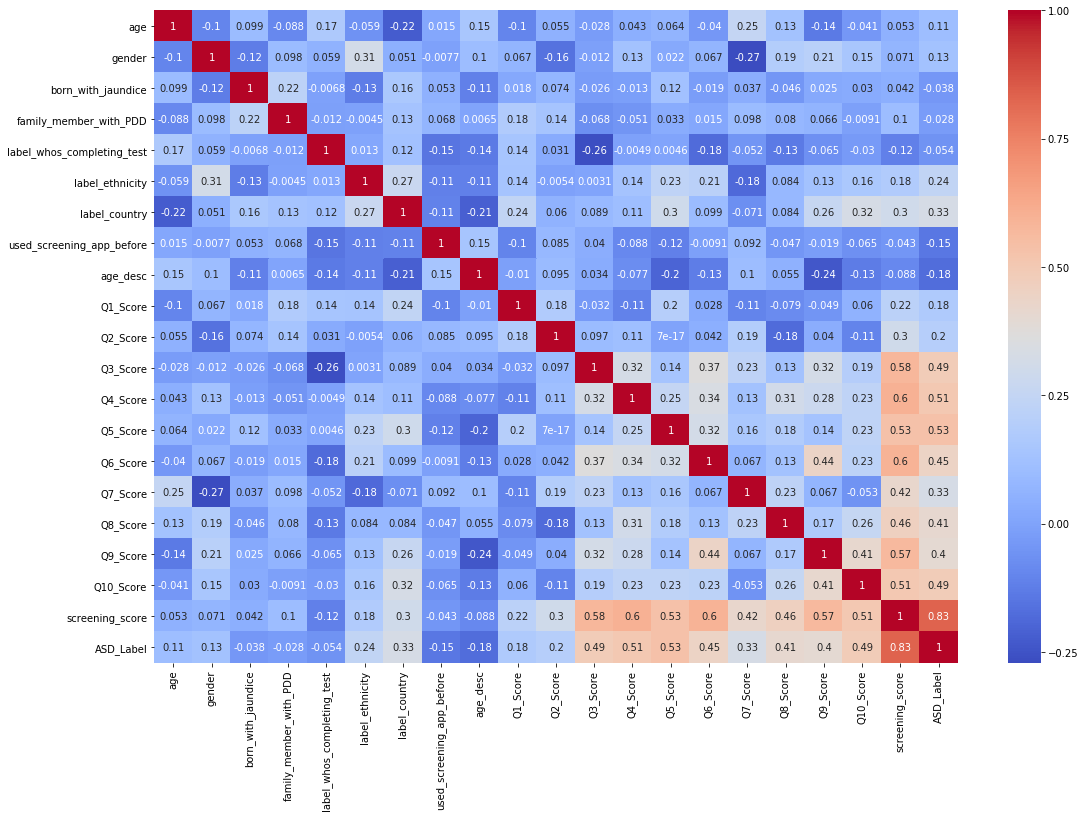

In [382]:
plt.figure(figsize=(18,12))
fig = sns.heatmap(adolescents_asd.corr(),cmap='coolwarm',annot=True)
top,bottom = fig.get_ylim()
fig.set_ylim(top+0.5,bottom-0.5)

#### ***As SCREENING_SCORE is highly co-related with ASD_Label, hence, removing SCREENING_SCORE from the DataFrame.***

In [383]:
adolescents_asd.drop(['screening_score'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# ***DataFrame to be used for Model Fit***

In [385]:
adolescents_asd.head()

,age,gender,born_with_jaundice,family_member_with_PDD,label_whos_completing_test,label_ethnicity,label_country,used_screening_app_before,age_desc,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score,ASD_Label
0,15,0,1,1,2,2,6,0,0,0,0,0,1,1,1,1,1,1,0,0
1,15,0,0,0,3,1,6,0,0,0,0,0,0,0,0,0,0,1,1,0
2,14,1,0,0,4,7,30,0,0,0,1,1,1,1,1,0,1,1,0,1
3,15,1,0,0,2,4,5,0,0,1,1,0,1,1,0,1,1,0,1,1
4,12,0,1,1,2,1,9,0,0,1,1,1,1,1,1,0,0,0,0,0


In [384]:
adolescents_asd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 20 columns):
age                           104 non-null int64
gender                        104 non-null int64
born_with_jaundice            104 non-null int64
family_member_with_PDD        104 non-null int64
label_whos_completing_test    104 non-null int32
label_ethnicity               104 non-null int32
label_country                 104 non-null int32
used_screening_app_before     104 non-null int64
age_desc                      104 non-null int64
Q1_Score                      104 non-null int64
Q2_Score                      104 non-null int64
Q3_Score                      104 non-null int64
Q4_Score                      104 non-null int64
Q5_Score                      104 non-null int64
Q6_Score                      104 non-null int64
Q7_Score                      104 non-null int64
Q8_Score                      104 non-null int64
Q9_Score                      104 non-null int64
Q10_Score    

## ***Import the Machine Learning Packages***

In [386]:
from sklearn.model_selection import train_test_split as tts, cross_val_score as crs_val
from sklearn.metrics import accuracy_score as acc_scr, recall_score as rec_scr, precision_score as prec_scr
from sklearn.naive_bayes import BernoulliNB as BNB, GaussianNB as GNB
from sklearn.ensemble import RandomForestClassifier as RFC, GradientBoostingClassifier as GBC

#### ***Seggregating the Pre-processed DataFrame into X and y child DataFrames***

In [387]:
X_adolescents = adolescents_asd.iloc[:,0:-1]

In [389]:
X_adolescents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 19 columns):
age                           104 non-null int64
gender                        104 non-null int64
born_with_jaundice            104 non-null int64
family_member_with_PDD        104 non-null int64
label_whos_completing_test    104 non-null int32
label_ethnicity               104 non-null int32
label_country                 104 non-null int32
used_screening_app_before     104 non-null int64
age_desc                      104 non-null int64
Q1_Score                      104 non-null int64
Q2_Score                      104 non-null int64
Q3_Score                      104 non-null int64
Q4_Score                      104 non-null int64
Q5_Score                      104 non-null int64
Q6_Score                      104 non-null int64
Q7_Score                      104 non-null int64
Q8_Score                      104 non-null int64
Q9_Score                      104 non-null int64
Q10_Score    

In [390]:
X_adolescents.head()

,age,gender,born_with_jaundice,family_member_with_PDD,label_whos_completing_test,label_ethnicity,label_country,used_screening_app_before,age_desc,Q1_Score,Q2_Score,Q3_Score,Q4_Score,Q5_Score,Q6_Score,Q7_Score,Q8_Score,Q9_Score,Q10_Score
0,15,0,1,1,2,2,6,0,0,0,0,0,1,1,1,1,1,1,0
1,15,0,0,0,3,1,6,0,0,0,0,0,0,0,0,0,0,1,1
2,14,1,0,0,4,7,30,0,0,0,1,1,1,1,1,0,1,1,0
3,15,1,0,0,2,4,5,0,0,1,1,0,1,1,0,1,1,0,1
4,12,0,1,1,2,1,9,0,0,1,1,1,1,1,1,0,0,0,0


In [391]:
y_adolescents = adolescents_asd.iloc[:,-1]

In [394]:
y_adolescents.describe()

count    104.000000
mean       0.605769
std        0.491051
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: ASD_Label, dtype: float64

In [395]:
y_adolescents.shape

(104,)

#### ***Creating Training and Testing Datasets***

In [445]:
X_train, X_test, y_train, y_test = tts(X_adolescents,y_adolescents,test_size=0.25,random_state=18)

In [446]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(78, 19) (26, 19) (78,) (26,)


## ***Bernoulli Naive Bayes***

In [447]:
bernaulli_nb = BNB()

In [448]:
model_bnb = bernaulli_nb.fit(X_train,y_train)

In [449]:
y_predict_bnb = model_bnb.predict(X_test)

In [450]:
acc_scr(y_predict_bnb,y_test)

0.8846153846153846

In [451]:
prec_scr(y_predict_bnb,y_test)

1.0

In [452]:
rec_scr(y_predict_bnb,y_test)

0.8235294117647058

In [455]:
crs_val(model_bnb,X_adolescents,y_adolescents,cv=10,n_jobs=5)

array([0.91666667, 0.90909091, 0.90909091, 1.        , 1.        ,
       0.9       , 0.7       , 1.        , 1.        , 0.9       ])

In [456]:
crs_val(model_bnb,X_adolescents,y_adolescents,cv=10,n_jobs=5).mean()

0.9234848484848485

## ***Gaussian Naive Bayes***

In [457]:
gaussian_nb = GNB()

In [458]:
model_gnb = gaussian_nb.fit(X_train,y_train)

In [459]:
y_predict_gnb = model_gnb.predict(X_test)

In [460]:
acc_scr(y_predict_gnb,y_test)

0.7692307692307693

In [461]:
prec_scr(y_predict_gnb,y_test)

0.9285714285714286

In [462]:
rec_scr(y_predict_gnb,y_test)

0.7222222222222222

In [463]:
crs_val(model_gnb,X_adolescents,y_adolescents,cv=10,n_jobs=5)

array([0.83333333, 0.81818182, 1.        , 1.        , 0.8       ,
       1.        , 0.6       , 0.9       , 0.9       , 0.7       ])

In [464]:
crs_val(model_gnb,X_adolescents,y_adolescents,cv=10,n_jobs=5).mean()

0.8551515151515151

## ***Random Forest Classifier***

In [465]:
rfc = RFC(n_estimators=200)

In [466]:
model_rfc = rfc.fit(X_train,y_train)

In [467]:
y_predict_rfc = model_rfc.predict(X_test)

In [468]:
acc_scr(y_predict_rfc,y_test)

0.8846153846153846

In [469]:
prec_scr(y_predict_rfc,y_test)

1.0

In [470]:
rec_scr(y_predict_rfc,y_test)

0.8235294117647058

In [471]:
crs_val(model_rfc,X_adolescents,y_adolescents,cv=10,n_jobs=5)

array([0.83333333, 0.90909091, 1.        , 1.        , 0.9       ,
       0.9       , 0.5       , 0.8       , 0.9       , 0.9       ])

In [472]:
crs_val(model_rfc,X_adolescents,y_adolescents,cv=10,n_jobs=5).mean()

0.8942424242424242

## ***Gradient Boosting Classifier***

In [473]:
gbc = GBC(n_estimators=200)

In [474]:
model_gbc = gbc.fit(X_train,y_train)

In [475]:
y_predict_gbc = model_gbc.predict(X_test)

In [476]:
acc_scr(y_predict_gbc,y_test)

0.8076923076923077

In [477]:
prec_scr(y_predict_gbc,y_test)

1.0

In [478]:
rec_scr(y_predict_gbc,y_test)

0.7368421052631579

In [479]:
crs_val(model_gbc,X_adolescents,y_adolescents,cv=10,n_jobs=5)

array([0.91666667, 0.81818182, 1.        , 1.        , 0.8       ,
       0.9       , 0.7       , 0.8       , 0.9       , 0.9       ])

In [480]:
crs_val(model_gbc,X_adolescents,y_adolescents,cv=10,n_jobs=5).mean()

0.8551515151515152